![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S3_clustering_I/main/figs/taller-meca-aprendizaje%20no%20supervisado_banner%201169%20x%20200%20px%20-05.png)

# K-medias. Fundamentos Teóricos.

Este *cuaderno* trata sobre el algoritmo de K-medias. Este algoritmo es una de las posibles formas de clustering o agrupamiento de datos. El objetivo del *cuaderno* es que usted aprenda qué es el algoritmo de K-medias, que sea capaz de reconocer las características y el funcionamiento de este algoritmo, y cómo construirlo e implementarlo.


**NO** es necesario editar el archivo o hacer una entrega. Sin embargo, los ejemplos contienen celdas con código ejecutable (`en gris`), que podrá modificar  libremente. Esta puede ser una buena forma de aprender nuevas funcionalidades del *cuaderno*, o experimentar variaciones en los códigos de ejemplo.

## Introducción

El algoritmo de K-medias, forma parte de los algoritmos de clustering basados en centroides y es uno de los más intuitivos y utilizados. El algoritmo  agrupa las observaciones en un número predefinido de K clusters de forma que, la suma de las varianzas internas de los clusters, sea lo menor posible. En otra palabras, busca que las observaciones dentro del cluster sean los más similares entre si, y fuera de los clusters lo más disimilares entre ellas.

Antes de adentrarnos en los detalles, veamos un paso a paso sin códigos ni matemáticas del algoritmo:

    1. Elegimos el número "K" de centroides, esto nos dará como resultado "K" clusters. El valor de "K" lo elegiremos nosotros.
    2. Colocamos estos "K" centroides en "K" lugares aleatorios entre los datos.
    3. Calculamos la distancia entre las observaciones y estos "K" centroides.
    4. Con estas distancias asignamos cada observación a su centroide más cercano.
    5. Para cada uno de los K clusters generados en el paso 4, calculamos nuevamente su centroide.
    6. Repetimos los pasos 4 y 5 hasta que las asignaciones no cambien o se alcance el número máximo de iteraciones establecido.


 Este algoritmo garantiza que, en cada paso, se reduzca la varianza intra cluster total hasta alcanzar un óptimo local. Debido a que el algoritmo de K-medias no evalúa todas las posibles distribuciones de las observaciones sino sólo parte de ellas, los resultados obtenidos dependen de la asignación aleatoria inicial (paso 2). Por esta razón, es importante ejecutar el algoritmo varias veces (entre 25 y 50 veces), cada una con una asignación aleatoria inicial distinta, y seleccionar aquella que de una menor varianza total.

## Implementación del algoritmo

Para comprender K-medias en un nivel más profundo, en esta sección veremos las matemáticas que respaldan al algoritmo. El procedimiento resulta de un problema matemático simple e intuitivo. Comencemos definiendo la notación:

  Sean $C_1, \dots , C_K$ los conjuntos que contienen los índices de las observaciones en cada cluster. Estos conjuntos satisfacen dos propiedades:

1. $C_1 \cup C_2 \cup \dots \cup  C_K=\{1,\dots n\}$, esto quiere decir que cada observación pertenece al menos a uno de los K clusters.
2. $C_k \cap C_{k'} \neq \emptyset$ $\forall k\neq k$, es decir, los clusters no se solapan: las observaciones pertenecen a un sólo cluster.


Por ejemplo, si la i-ésima observación está en el k-ésimo grupo, entonces $i \in C_k$.

Como dijimos anteriormente, la idea detrás del agrupamiento de K-medias es que un buen agrupamiento es aquel en el que la variación dentro del cluster es lo más pequeña posible. La variación dentro del cluster  $C_k$ es una medida $W(C_k)$ que nos indica cuanto difieren entre si las observaciones dentro de un conglomerado. Por lo tanto, si el objetivo es que las observaciones sean lo más similares entre si, el problema que vamos a resolver es:

\begin{align}
\underset{C_{1,}\dots,C_{K}}{minimizar}\left\{ \sum_{k=1}^{K}W(C_{k})\right\}
\end{align}

Esta fórmula nos dice que estamos buscando dividir las observaciones en K clusters de forma tal que la variación dentro del cluster,  sumada a lo largo de  los K clusters, sea lo más pequeña posible.

Pero, para poder lograrlo es necesario definir la variación dentro del grupo. Hay muchas formas posibles de definir este concepto, pero la opción más común es la distancia euclidiana al cuadrado (recuerde que en el *cuaderno* de *Introducción al Análisis de Clusters* revisamos las distintas funciones de distancias y disimilaridad).

Es decir, tenemos que
\begin{align}
W(C_k)=\frac{1}{|C_k|}\sum_{i,i' \in C_k}\sum_{j=1}^p(x_{ij}-x_{i'j})^2
\end{align}

donde $|C_k|$ denota el número de observaciones el el cluster $k$.  Esta ecuación nos dice que la variación dentro del cluster  k-ésimo es la suma de todos los pares de distancias Euclidianas cuadráticas de las observaciones en este cluster dividida por el número total de observaciones en el mismo.

Es decir, el problema de optimización por resolver queda:

\begin{align}
\underset{C_{1,}\dots,C_{K}}{minimizar}\left\{ \sum_{k=1}^{K} \frac{1}{|C_k|}\sum_{i,i' \in C_k}\sum_{j=1}^p(x_{ij}-x_{i'j})^2)\right\}
\end{align}


Necesitamos entonces un algoritmo que nos permita resolver este problema. Notemos que a priori este parece ser un problema muy difícil especialmente si $n$ es muy grande ya que existen aproximadamente $K^n$ formas de dividir $n$ observaciones en $K$ clusters. Sin embargo, el siguiente algoritmo proporciona óptimos locales del problema de optimización:

1. Asignamos aleatoriamente un número, del 1 al K, a cada una de las observaciones. Esta es la asignación inicial de las observaciones.

2. Iteramos hasta que las asignaciones de clusters dejen de cambiar:
    
    (a) Para cada uno de los K clusters, calculamos el centroide del cluster. El centroide del cluster k-ésimo es el vector de las medias de los p atributos de las observaciones en el k-ésimo cluster.
    
    (b) Asignamos cada observación al cluster cuyo centroide sea el más cercano (donde más cercano se define utilizando la distancia euclidiana).


Este algoritmo garantiza que en cada iteración  el valor de $\left\{ \sum_{k=1}^{K} \frac{1}{|C_k|}\sum_{i,i' \in C_k}\sum_{j=1}^p(x_{ij}-x_{i'j})^2)\right\}$ sea cada vez más pequeño. Para entender por qué, notamos la siguiente identidad:

\begin{align}
 \sum_{k=1}^{K} \frac{1}{|C_k|}\sum_{i,i' \in C_k}\sum_{j=1}^p(x_{ij}-x_{i'j})^2)= 2 \sum_{i \in C_k}\sum_{j=1}^p(x_{ij}-\bar{x}_{kj})^2)
\end{align}


donde $\bar{x}_{kj}$ es la media de la característica j en el cluster $C_k$: $\frac{1}{|C_k|}\sum_{\in C_k}x_{ij}$.

Entonces, en el paso 2(a) las medias de cada atributo  son las constantes que minimizan las desviaciones de la suma de los cuadrados, y en el paso 2(b), reasignar las observaciones sólo puede mejorar $\sum_{i \in C_k}\sum_{j=1}^p(x_{ij}-\bar{x}_{kj})^2)$.

Esto implica que a medida que el algoritmo corra, los clusters obtenidos van a continuar mejorando, hasta que el resultado no cambie; la función objetivo no aumentará. Cuando el resultado no cambia, hemos alcanzado un óptimo local.

### Limitaciones


K-medias es uno de los algoritmos de clustering más utilizados y se destaca por su sencillez y velocidad. Sin embargo, presenta una serie de limitaciones que se deben tener en cuenta:

 - Requiere que se indique de antemano el número de clusters que se quieren crear. Esto puede ser difícil si no disponemos de información adicional sobre los datos con los que se trabaja. Se han desarrollado varias estrategias para ayudar a identificar potenciales valores óptimos de K (que veremos a continuación), pero todas ellas son orientativas.

- Tiene dificultad para detectar clusters alargados o con formas irregulares.


- Dado que encuentra óptimos locales, los clusters resultantes pueden variar dependiendo de la asignación aleatoria inicial de los centroides. Para minimizar este problema, se recomienda repetir el proceso multiples veces y seleccionar como resultado definitivo el que tenga menor suma total de varianza interna. Aun así, solo se puede garantizar la reproducibilidad de los resultados si se emplean semillas.


- Presenta problemas de robustez frente a outliers. La única solución es excluirlos o recurrir a otros métodos de clustering más robustos como K-medoides.


### K-medias paso a paso en `Python`

Ilustremos entonces como implementaríamos K-medias desde cero en `Phyton`. Para ello, vamos a generar datos que pertenecen a distintos clusters, y vamos a fingir que desconocemos estos clusters. Luego vamos a implementar K-medias y ver que tan buen trabajo hace.

Comencemos entonces, generando los datos usando la función `make_blobs` de la librería `Scikit-learn`, que genera clusters de puntos. Para esta ilustración, crearemos 1000 observaciones con 2 atributos que perteneces a 3 clusters. Para hacer replicable el ejercicio, elegiremos la semilla (`random_state`) `123` (te invito a probar cambiando la semilla):

In [1]:
#Cargamos las librerías a utilizar
from sklearn.datasets import make_blobs

#Creamos y visualizamos los datos
X, y = make_blobs(n_samples = 1000, n_features = 2, centers = [[-6,2],[3,-4],[-5,10]], random_state = 123)

El parámetro `n_samples` determina el número total de puntos de datos generados, `n_features` define el número de dimensiones generadas por el conjunto de datos, y `centres` determina la posición de los centroides o alternativamente el número de centroides.

Para vizualizar los clusters usemos la librería `matplotlib`:


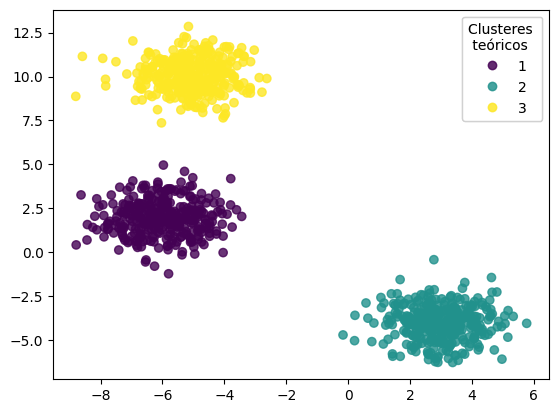

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
g = plt.scatter(X[:,0], X[:,1], c = y + 1, alpha = 0.8)
legend = ax.legend(*g.legend_elements(), loc = "upper right", title = "Clusteres \n teóricos")
ax.add_artist(legend)
plt.show()

En la gráfica anterior entonces, tenemos cada nube de puntos y el cluster al que pertenece. Sin embargo, cuando trabajamos, no tenemos esta información y observamos lo siguiente:

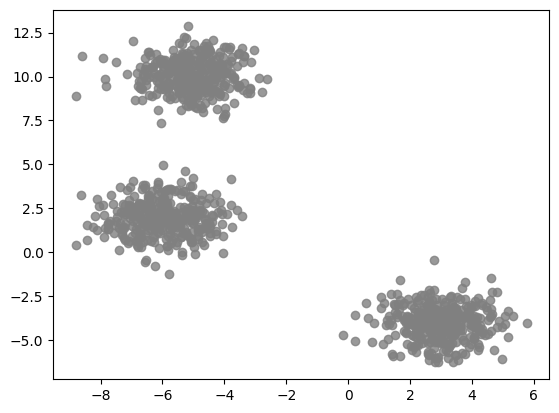

In [3]:
fig, ax = plt.subplots()
g = plt.scatter(X[:,0], X[:,1], c = 'grey', alpha = 0.8)
plt.show()

Implementemos entonces el algoritmo para ver si podemos recuperar identificar los 3 clusters subyacentes. El primer paso indicaba que debemos elegir $K$. Dado que tenemos "información privilegiada", comenzaremos eligiendo 3.

Luego necesitamos definir aleatoriamente la posición de los 3 centroides, para ello, haremos uso de las librerías `numpy` y `random`:


In [4]:
import numpy as np
import random as rd

K = 3 # Número de clusters a encontrar
n_observaciones = X.shape[0] # Número de observaciones
n_variables = X.shape[1]     # Número de atributos (columnas) en los datos

# Definimos un array vacío para alojar los centroides
centroides = np.array([]).reshape(n_variables, 0)

rd.seed(123) # Semilla para garantizar la replicabilidad de los resultados

for k in range(K):
    # Se escoge aleatoriamente una observación
    indice = rd.randint(0, n_observaciones - 1)
    centroides = np.c_[centroides, X[indice]]

Los centroides elegidos aleatoriamente son:

El centroide 1:

In [5]:
centroides[:,0]

array([-6.29150671,  2.24537941])

El centroide 2:

In [6]:
centroides[:,1]

array([ 4.23187179, -5.40726856])

El centroide 3:

In [7]:
centroides[:,2]

array([-5.58613692,  2.04734188])

Con los centroides definidos, tenemos que calcular la distancia de las observaciones a cada uno de estos puntos:

In [8]:
distancias = np.array([]).reshape(n_observaciones, 0)

for k in range(K):

    distancia = np.sum((X - centroides[:,k])**2, axis = 1) # Formula distancia euclideana

    distancias = np.c_[distancias, distancia]


y asignamos las observaciones al centroide más cercano:

In [9]:
clusteres = np.argmin(distancias, axis = 1) + 1


Luego de la primera iteración tenemos el siguiente resultado:

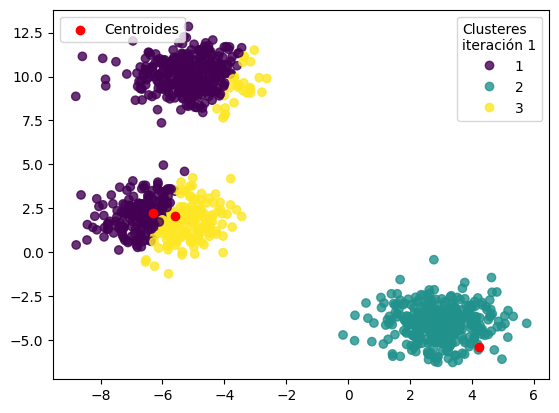

In [10]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots()

g = plt.scatter(X[:,0], X[:,1], c = clusteres, alpha = 0.8)

legend = ax.legend(*g.legend_elements(), loc = "upper right", title = "Clusteres\niteración 1")

ax.add_artist(legend)
g_centroides = plt.scatter(centroides[0,:], centroides[1,:], color = "red", label = "Centroides")

plt.legend([g_centroides], ["Centroides"], loc = "upper left")
plt.show()

La figura nos muestra que si bien los puntos pertenecientes al cluster inferior derecho están bien asignados, no es asi con los otros dos grupos. El algoritmo entonces nos sugiere continuar iterando hasta que las asignaciones de los clusters dejen de cambiar. Entonces, veamos que sucede en una segunda iteración.

En esta segunda iteración vamos a definir a los centroides como la media de los clusters encontrados anteriormente. Pero primero vamos a generar un diccionario, donde cada entrada del diccionario contiene las observaciones que corresponden a cada cluster (existen varias formas de hacer este paso, te invito a explorar otras formas)

In [11]:
Y = {}
for k in range(K):
    Y[k+1] = np.array([]).reshape(2,0)
# Cada observación se asigna a su correspondiente cluster en el diccionario
for i in range(n_observaciones):
    Y[clusteres[i]] = np.c_[Y[clusteres[i]], X[i]]

for k in range(K): # Arreglamos formato
    Y[k+1] = Y[k+1].T


Las diez primeras observaciones que pertenecen al primer centroide son:

In [12]:
Y[1][1:10]

array([[-8.12310035,  3.03972709],
       [-6.26929349,  1.88914928],
       [-4.65757742, 11.24201662],
       [-5.1293438 , 10.50293495],
       [-6.68245093,  0.30794758],
       [-6.76129424,  2.00364515],
       [-5.35308014, 11.86980891],
       [-6.14929094,  3.98676304],
       [-5.54841834, 11.06538295]])

El paso anterior lo realizamos porque nos simplifica el cálculo de las medias:

In [13]:
centroides_nuevos = np.array([]).reshape(n_variables, 0)
for k in range(K):
    centroides_nuevos = np.c_[centroides_nuevos, np.mean(Y[k+1], axis = 0)]

El centroide del nuevo primer cluster es entonces:


In [14]:
centroides_nuevos[:,0]

array([-5.76555354,  7.21689162])

Nuevamente, tenemos que asignar las observaciones al centroide más cercano

In [15]:
distancias = np.array([]).reshape(n_observaciones, 0)
for k in range(K):
    distancia = np.sum((X - centroides_nuevos[:,k])**2, axis = 1)
    distancias = np.c_[distancias, distancia]
clusteres = np.argmin(distancias, axis = 1) + 1

Verifiquemos entonces la asignación de los puntos a los distintos clusters luego de la segunda iteración:

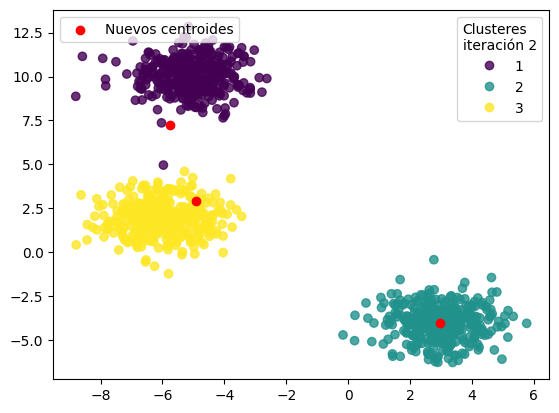

In [16]:
fig, ax = plt.subplots()

g = plt.scatter(X[:,0], X[:,1], c = clusteres, alpha = 0.8)
legend = ax.legend(*g.legend_elements(), loc = "upper right", title = "Clusteres\niteración 2")
ax.add_artist(legend)

g_centroides = plt.scatter(centroides_nuevos[0,:], centroides_nuevos[1,:], color = "red", label = "Centroides")
plt.legend([g_centroides], ["Nuevos centroides"], loc = "upper left")

plt.show()

Notemos como en esta segunda iteración cambiaron los centroides, y algunas asignaciones. Como las asignaciones cambiaron, el algoritmo nos dice que debemos repetir los pasos anteriores hasta que las observaciones no cambien de clusters, o puesto de otra forma, que los centroides no cambien.

Para ello podemos implementar el siguiente bucle que va a continuar mientras que los centroides estén cambiando. Para ver como va la iteración, vamos a hacer que el bucle nos grafique cada uno de los avances:

Iteración 1


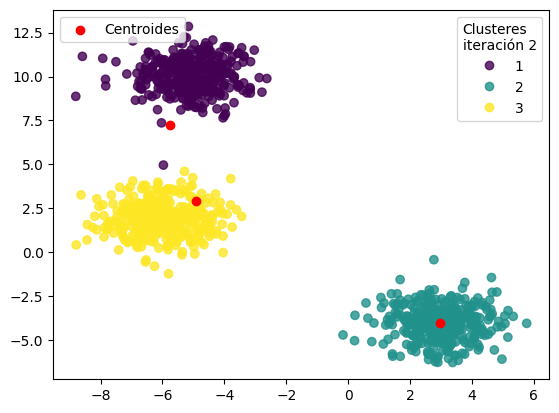

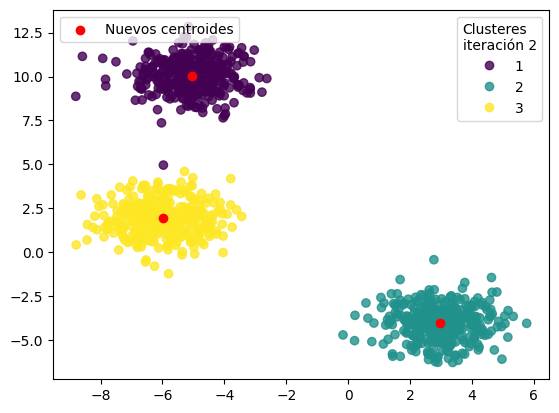

Iteración 2


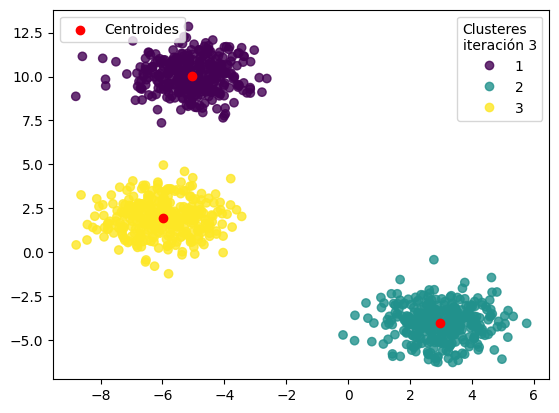

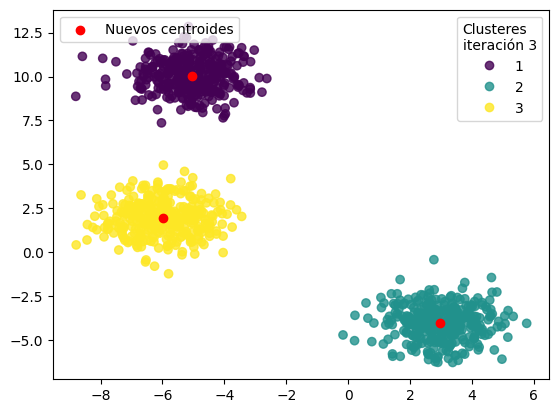

Iteración 3


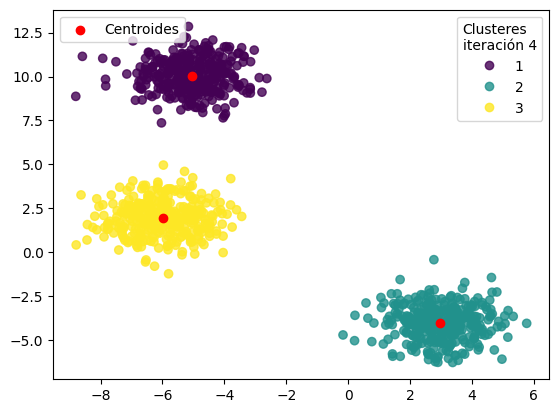

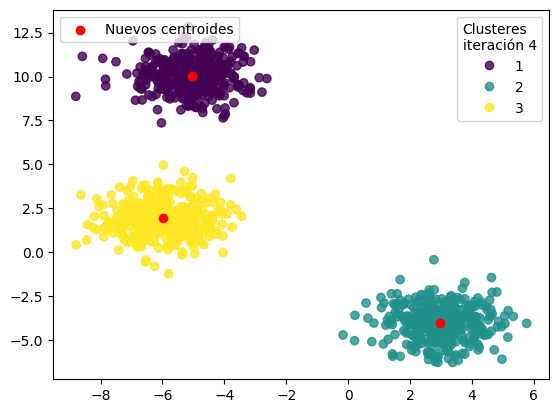

In [17]:
cambio = np.sum(centroides_nuevos - centroides) # Definimos cambio, como la diferencia entre los centroides viejos y los nuevos
n = 0
while cambio != 0:
    n += 1
    print("Iteración", str(n))
    centroides = centroides_nuevos
    # Calculamos distancias y asignamos clusteres
    distancias = np.array([]).reshape(n_observaciones, 0)
    for k in range(K):
        distancia = np.sum((X - centroides[:,k])**2, axis = 1) # Formula distancia euclideana
        distancias = np.c_[distancias, distancia]
    clusteres = np.argmin(distancias, axis = 1) + 1

    # Graficamos avance
    fig, ax = plt.subplots()

    g_puntos = plt.scatter(X[:,0], X[:,1], c = clusteres, alpha = 0.8, label = "Centroides")
    legend = ax.legend(*g_puntos.legend_elements(), loc = "upper right", title = "Clusteres\niteración " + str(n + 1))
    ax.add_artist(legend)

    g_centroides = plt.scatter(centroides[0,:], centroides[1,:], color = "red", label = "Centroides")
    plt.legend([g_centroides], ["Centroides"], loc = "upper left")

    plt.show()

    # Recalculamos centroides
    Y = {}
    for k in range(K):
        Y[k+1] = np.array([]).reshape(2,0)
    for i in range(n_observaciones):
        Y[clusteres[i]] = np.c_[Y[clusteres[i]], X[i]]
    for k in range(K):
        Y[k+1] = Y[k+1].T
    centroides_nuevos = np.array([]).reshape(n_variables, 0)
    for k in range(K):
        centroides_nuevos = np.c_[centroides_nuevos, np.mean(Y[k+1], axis = 0)]

    # Graficamos avances
    fig, ax = plt.subplots()

    g_puntos = plt.scatter(X[:,0], X[:,1], c = clusteres, alpha = 0.8, label = "Centroides")
    legend = ax.legend(*g_puntos.legend_elements(), loc = "upper right", title = "Clusteres\niteración " + str(n + 1))
    ax.add_artist(legend)

    g_centroides = plt.scatter(centroides_nuevos[0,:], centroides_nuevos[1,:], color = "red", label = "Centroides")
    plt.legend([g_centroides], ["Nuevos centroides"], loc = "upper left")

    plt.show()

    cambio = np.sum(centroides_nuevos - centroides)

En este ejemplo sencillo, donde teníamos información de antemano y los grupos estaban bien separados, rápidamente llegamos a una separación correcta.

Veamos otro ejemplo un poco más complicado. Creamos nuevamente una base con 1000 observaciones con 5 centroides.

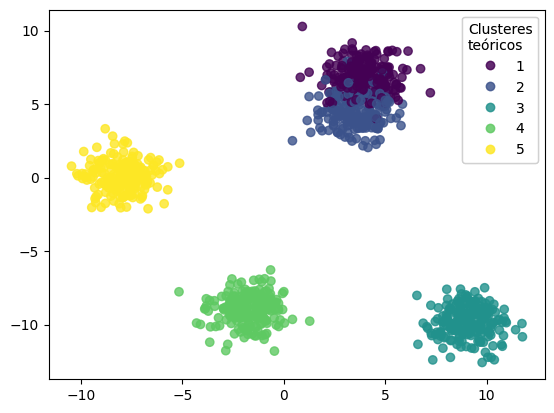

In [18]:
X, y = make_blobs(n_samples = 1000, n_features = 2, centers = 5, random_state = 666)


fig, ax = plt.subplots()
g = plt.scatter(X[:,0], X[:,1], c = y + 1, alpha = 0.8)
legend = ax.legend(*g.legend_elements(), loc = "upper right", title = "Clusteres\nteóricos")
ax.add_artist(legend)
plt.show()



Este caso claramente es un poco más difícil ya que los puntos en el cluster 1 se mezclan con los del 2. Para no repetir código, pongamos los pasos anteriores en una función que llamaremos `kmedias`; que además nos permitirá correr el algoritmo para distintos valores de $K$.


In [19]:
def kmedias(X, K, max_iter = 100, visualizar_proceso = True,semilla=666):
    n_observaciones = X.shape[0] # Número de observaciones de la base
    n_variables = X.shape[1] # Número de columnas en la base
    # Definimos un array vacío para alojar los centroides
    centroides = np.array([]).reshape(n_variables, 0)
    rd.seed(semilla) # Semilla para garantizar la replicabilidad de los resultados
    for k in range(K):
        # Se escoge aleatoriamente una observación
        indice = rd.randint(0, n_observaciones - 1)
        centroides = np.c_[centroides, X[indice]]
    n = 0
    cambio = 1
    while cambio != 0:
        n += 1
        if n >= max_iter:
            break
        print("Iteración", str(n))
        # Calculamos distancias y asignamos clusteres
        distancias = np.array([]).reshape(n_observaciones, 0)
        for k in range(K):
            distancia = np.sum((X - centroides[:,k])**2, axis = 1) # Formula distancia euclideana
            distancias = np.c_[distancias, distancia]
        clusteres = np.argmin(distancias, axis = 1) + 1

        # Graficamos avance
        if visualizar_proceso:
            fig, ax = plt.subplots()

            g_puntos = plt.scatter(X[:,0], X[:,1], c = clusteres, alpha = 0.8, label = "Centroides")
            legend = ax.legend(*g_puntos.legend_elements(), loc = "upper right", title = "Clusteres\niteración " + str(n ))
            ax.add_artist(legend)

            g_centroides = plt.scatter(centroides[0,:], centroides[1,:], color = "red", label = "Centroides")
            plt.legend([g_centroides], ["Centroides"], loc = "upper left")

            plt.show()

        # Recalculamos centroides
        Y = {}
        for k in range(K):
            Y[k+1] = np.array([]).reshape(2,0)
        for i in range(n_observaciones):
            Y[clusteres[i]] = np.c_[Y[clusteres[i]], X[i]]
        for k in range(K):
            Y[k+1] = Y[k+1].T
        centroides_nuevos = np.array([]).reshape(n_variables, 0)
        for k in range(K):
            centroides_nuevos = np.c_[centroides_nuevos, np.mean(Y[k+1], axis = 0)]

        # Graficamos avances
        if visualizar_proceso:
            fig, ax = plt.subplots()

            g_puntos = plt.scatter(X[:,0], X[:,1], c = clusteres, alpha = 0.8, label = "Centroides")
            legend = ax.legend(*g_puntos.legend_elements(), loc = "upper right", title = "Clusteres\niteración " + str(n))
            ax.add_artist(legend)

            g_centroides = plt.scatter(centroides_nuevos[0,:], centroides_nuevos[1,:], color = "red", label = "Centroides")
            plt.legend([g_centroides], ["Nuevos centroides"], loc = "upper left")

            plt.show()

        cambio = np.sum(centroides_nuevos - centroides)
        centroides = centroides_nuevos
    return(clusteres)


Si graficamos los datos, sin conocimiento previo de cómo se generaron, veríamos la siguiente gráfica que nos llevaría a pensar que tenemos 4 clusters.

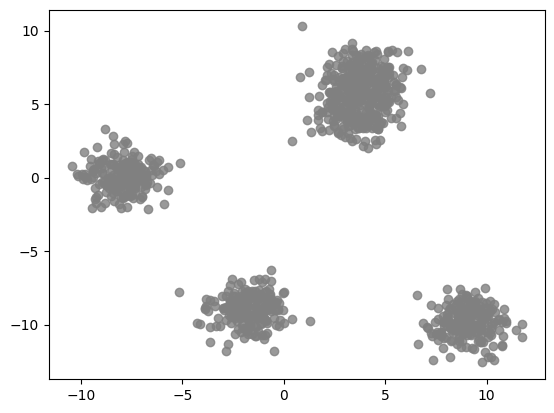

In [20]:
fig, ax = plt.subplots()
g = plt.scatter(X[:,0], X[:,1], c = 'grey', alpha = 0.8)
plt.show()

¿Qué pasaría entonces si especificamos 4 clusters?

Iteración 1


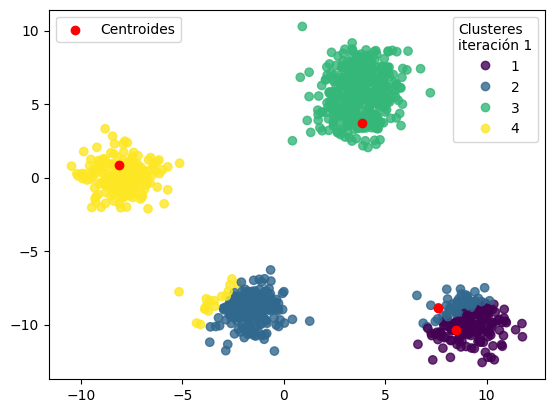

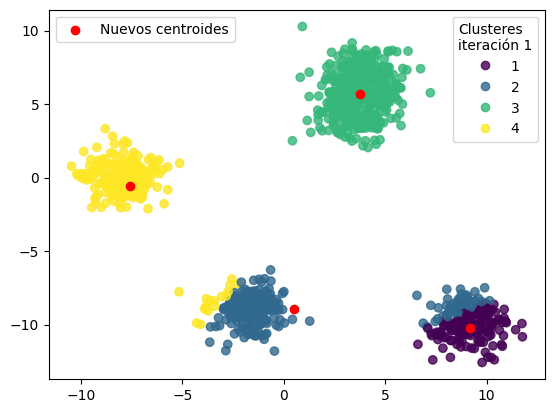

Iteración 2


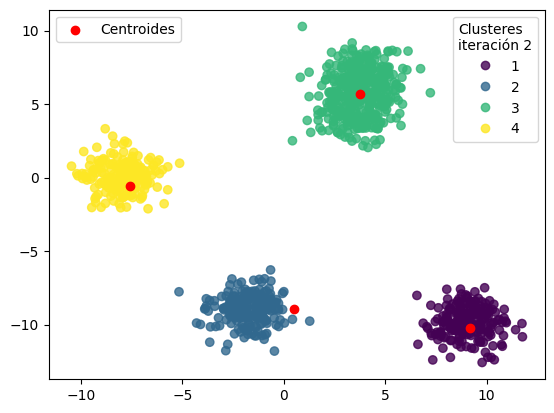

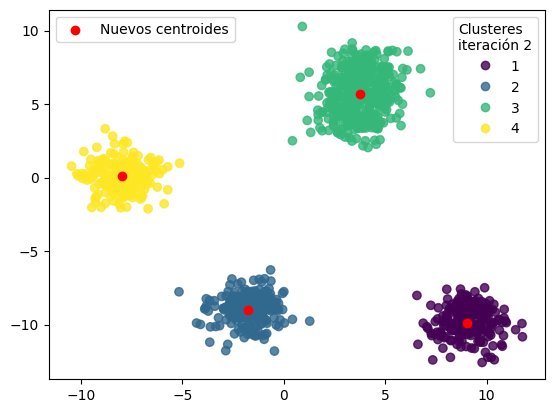

Iteración 3


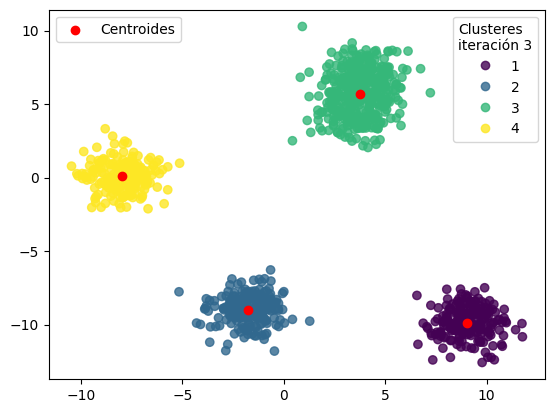

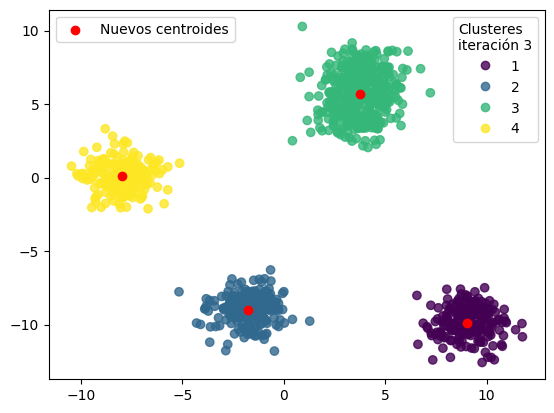

In [21]:
clusteres_4 = kmedias(X, K = 4, visualizar_proceso = True)

En 3 iteraciones encuentra estos 4 clusters. Pero nosotros, "sabemos" que en realidad son 5. Veamos cómo funcionaría con 5.

Iteración 1


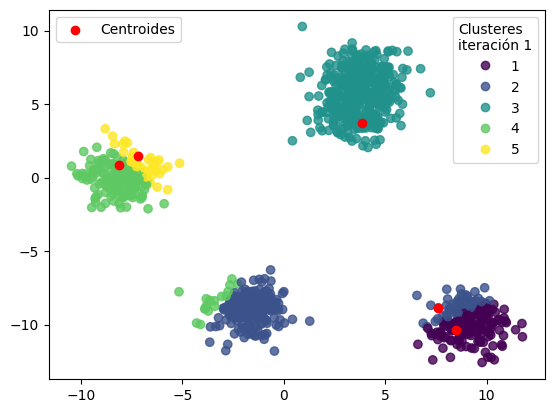

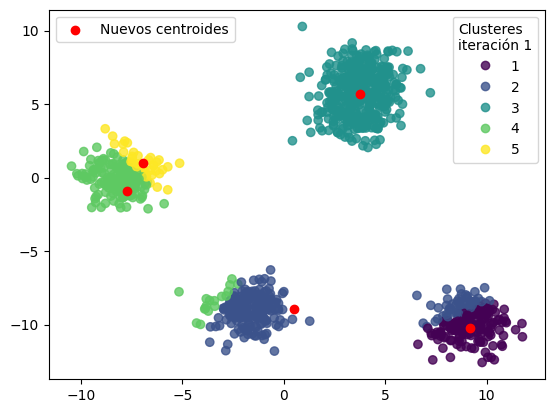

Iteración 2


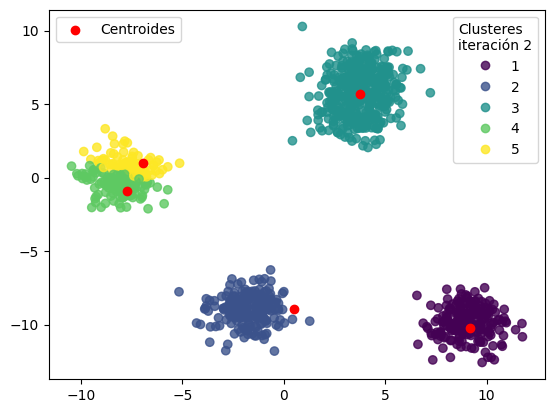

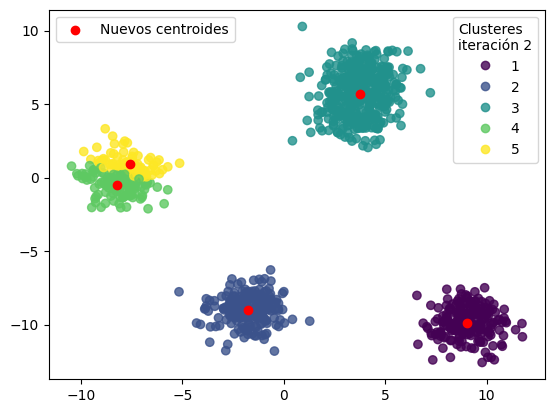

Iteración 3


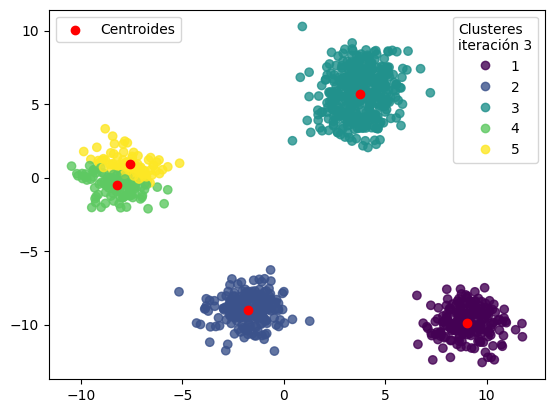

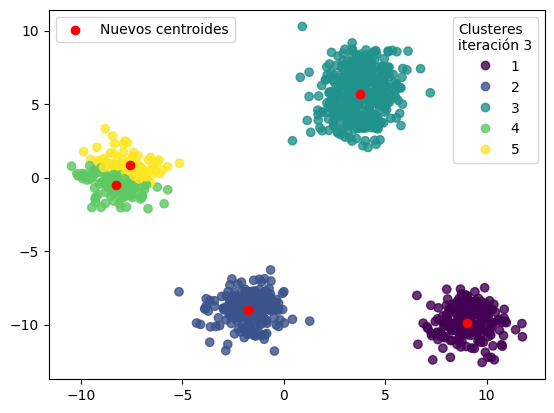

Iteración 4


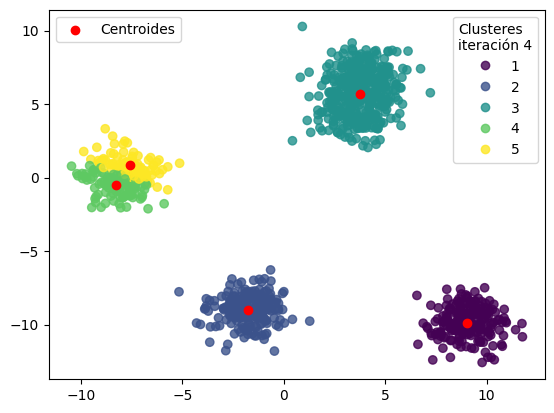

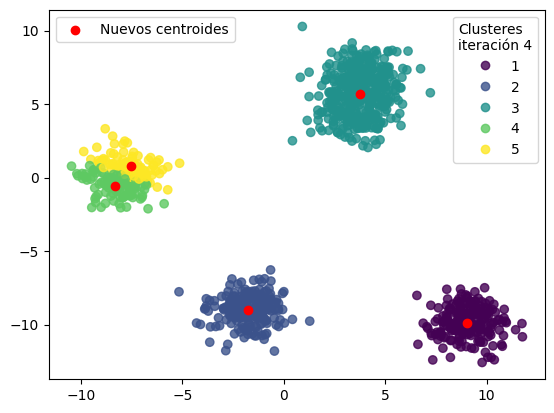

Iteración 5


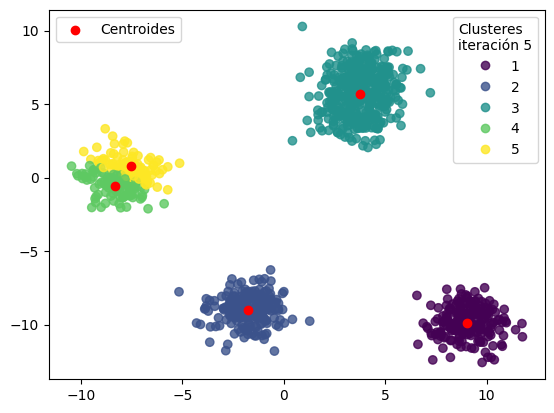

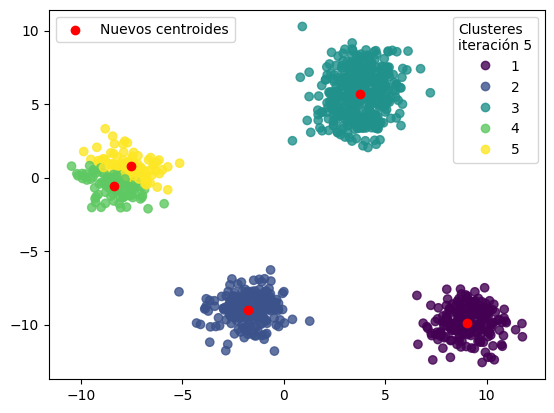

Iteración 6


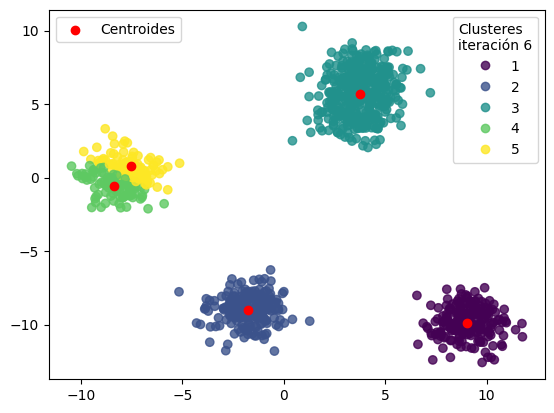

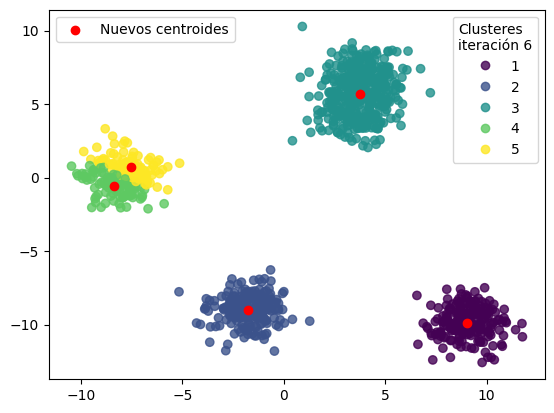

Iteración 7


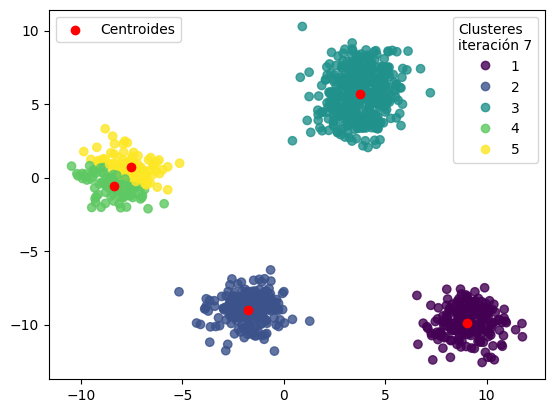

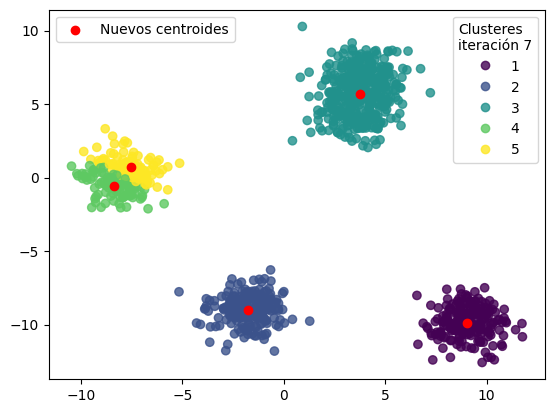

Iteración 8


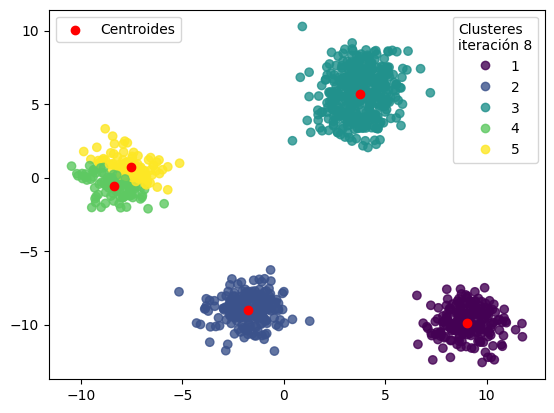

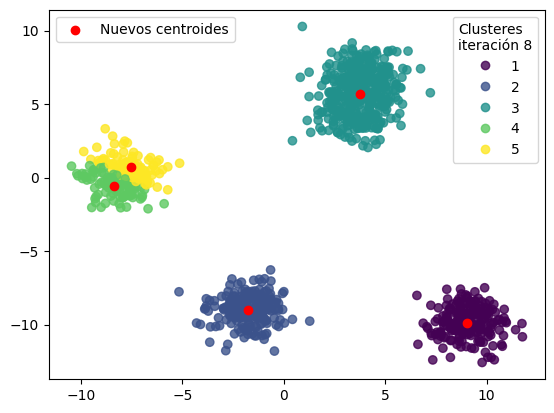

In [22]:
clusteres_5 = kmedias(X, K = 5, visualizar_proceso = True)

En este caso encontró 5 clusters, pero no coinciden con los que formaron los datos. Estos se debe a que el algoritmo esta forzado a encontrar 5 clusters, y los que encuentran dependen de la asignación aleatoria inicial de los centroides. ¿Qué pasa entonces si volvemos a correr cambiando la semilla, lo que nos dará otros centroides iniciales?

Iteración 1


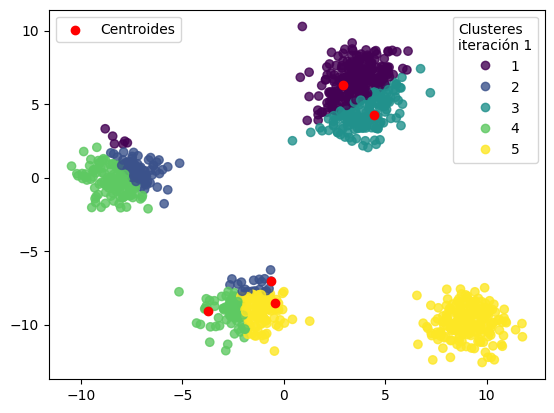

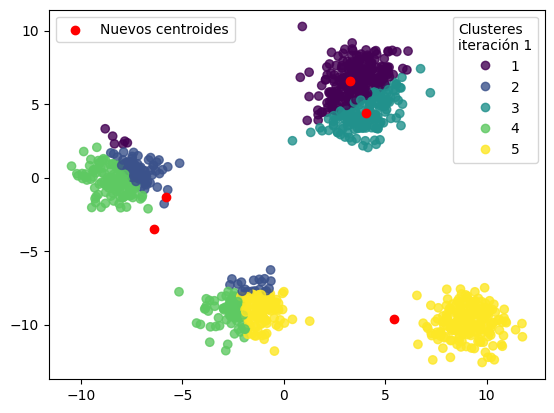

Iteración 2


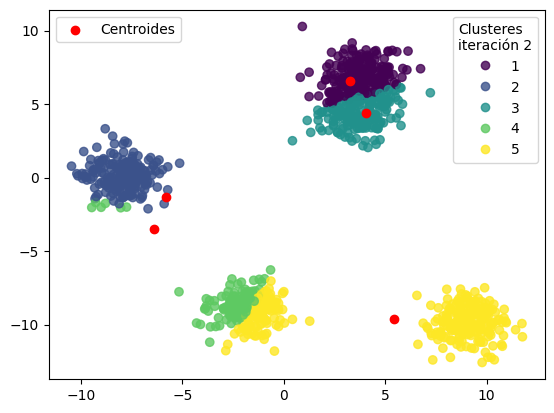

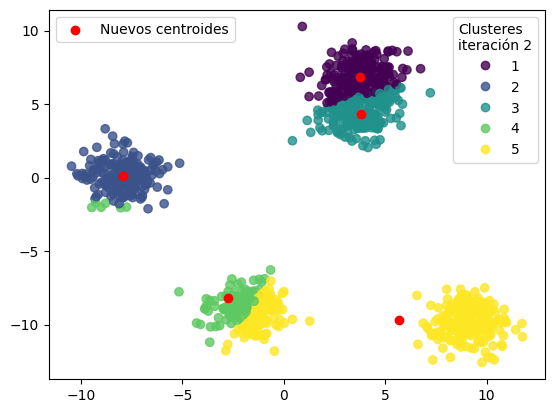

Iteración 3


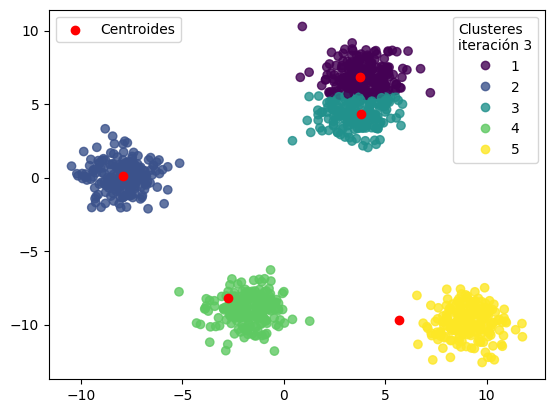

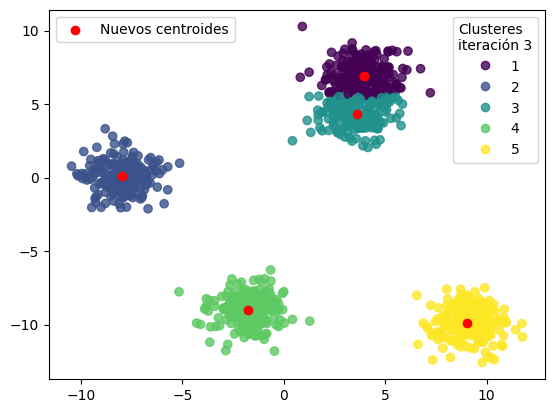

Iteración 4


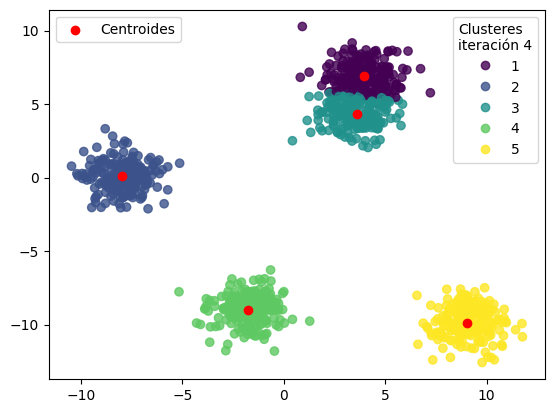

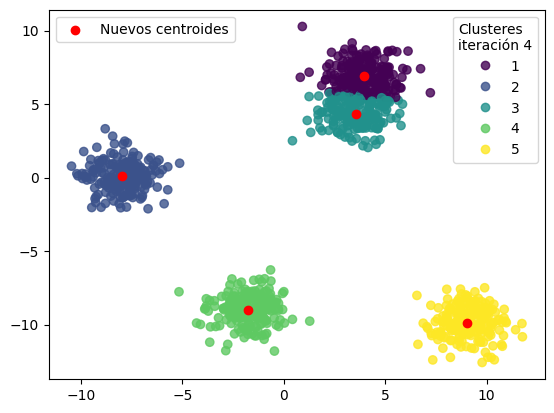

Iteración 5


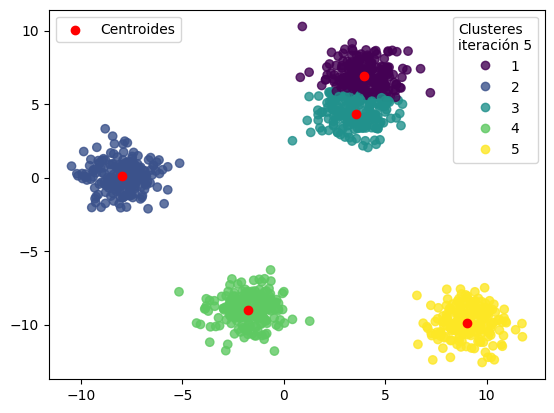

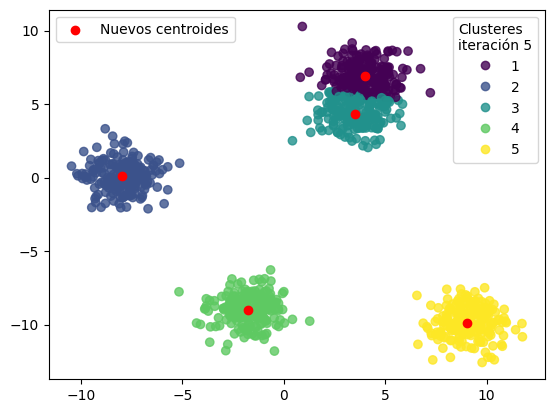

Iteración 6


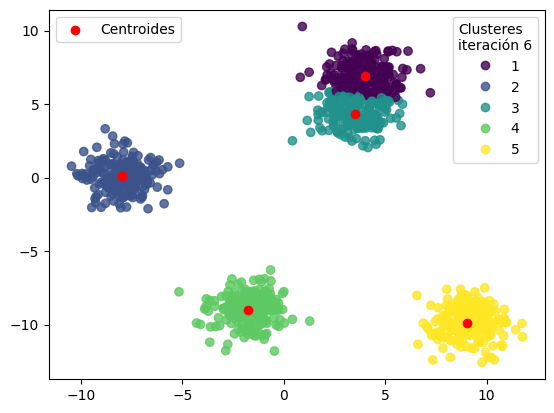

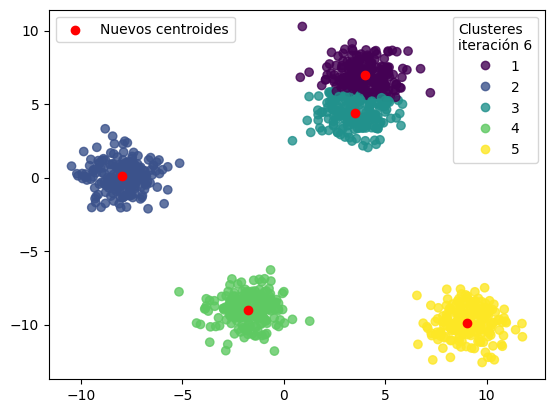

Iteración 7


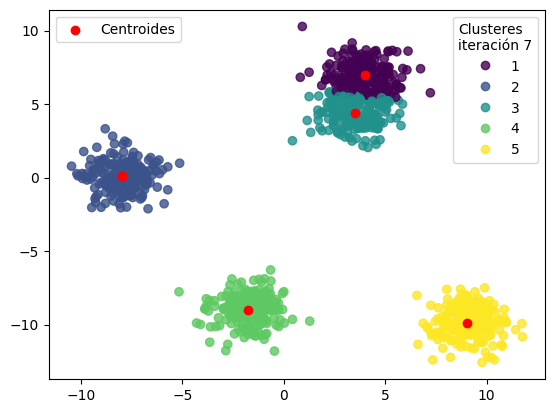

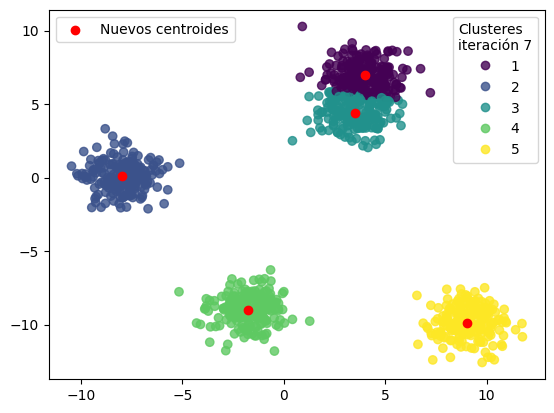

In [23]:
clusteres_5 = kmedias(X, K = 5, visualizar_proceso = True, semilla=1234)

En esta iteración encontramos los clusters originales. Este punto es muy importante y constituye una de las limitaciones del algoritmo . Al encontrar  óptimos locales, los cluster resultantes pueden diferir dependiendo de la asignación aleatoria inicial de los centroides. Es por esto, que para minimizar este problema, se recomienda repetir el proceso múltiples veces y seleccionar el resultado definitivo a partir de algún criterio previamente establecido (que veremos a continuación). Así mismo, es muy importante especificar las semillas para poder garantizar la reproducibilidad de los resultados.


#### K-medias  con `sklearn`

En la práctica, no es necesario escribir nuestra propia función, la librería `Scikit-learn` contiene la función de k-medias: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. La ventaja del uso de esta librería es que los algoritmos son más eficientes y están optimizados; por lo que suelen correr más rápido y con menos errores. Su implementación es sencilla y entre sus parámetros se destacan:

   - `n_clusters`: determina el número $K$ de clusters que se van a generar.

   - `init`: es el método de inicialización para asignar los centroides iniciales. Por defecto se emplea 'k-means++', que trata de alejar los centroides lo máximo posible, esto facilita la convergencia. Otra estrategia, es utilizar la inicialización aleatoria ('random') que vinimos usando hasta ahora.

   - `n_init`: determina el número de veces que se va a repetir el proceso, cada vez con una asignación aleatoria inicial distinta. Es recomendable que este último valor sea alto, entre 10-25, el default solía ser 10, pero desde la versión `1.4` es 'auto', y el resultado es el mejor de las `n_init` corridas consecutivas en términos de la suma de cuadrados intra cluster.

   - `max_iter`: número máximo de iteraciones permitidas.

   - `random_state`: semilla para garantizar la reproducibilidad de los resultados.

Si bien tiene varios parámetros, estos tienen ciertos valores iniciales y podemos ejecutar la función simplemente especificando el número de clusters y de la semilla (usted puede modificar y experimentar qué sucede cuando se cambian los otros parámetros).

In [24]:
from sklearn.cluster import KMeans

kmeans_5 = KMeans(n_clusters = 5, random_state = 123, n_init=10).fit_predict(X)

El método `fit_predict`, computa los clusters y predice el cluster al que pertenece cada observación. Entonces, las 4 primeras observaciones pertenecen al cluster 0, 2, 3 y 1 respectivamente.

In [25]:
kmeans_5[0:4]

array([2, 4, 3, 0], dtype=int32)

También podemos visualizar la predicción.

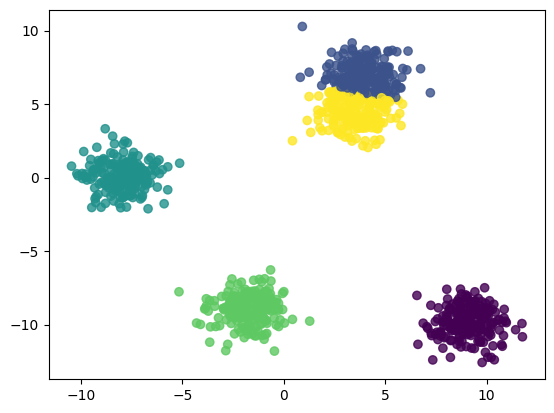

In [26]:
fig, ax = plt.subplots()
g_puntos = plt.scatter(X[:,0], X[:,1], c = kmeans_5, alpha = 0.8, label = "Centroides")
plt.show()

## ¿Cuántos K (clusters) debemos elegir?


Elegir el número de clusters es un paso clave al aplicar el algoritmo de K-medias. La pregunta natural que surge aquí es si hay algún método para hacerlo. Desafortunadamente, no existe una forma objetiva aceptada en la literatura de responderla. Sin embargo, hay dos métodos simples que pueden servir de guía: el método de codo y el coeficiente de Silhouette.



### Método del codo

El  método de codo, o Elbow (en inglés), consiste en graficar la varianza intra cluster en función del número de clusters y encontrar el punto de la curva, codo, a partir del cual la mejora deja de ser notable.

La desventaja de este método para seleccionar $K$ es que no existen criterios claros para saber hasta que punto una disminución marginal es razonable o no, y esto lleva a diferencias entre investigadores.


### Coeficiente de Silhouette

Otro criterio, es el coeficiente de Silhouette pues este nos indica la calidad de los clusters en donde números más grandes corresponden con mejores divisiones. El valor de Silhouette es igual a:

\begin{align}
s(i)= \frac{b(i)-a(i)}{\max\{a(i),b(i)\}},\ \text{si } |C_{i}|>1
\end{align}

En donde, para la observación $i$ en el grupo $C_ {i}$:

\begin{align}
a(i)=\frac {1}{|C_{i}|-1}\sum _{j\in C_{i},i\neq j}d(i,j)
\end{align}

\begin{align}
b(i)=\min _{k\neq i}{\frac {1}{|C_{k}|}}\sum _{j\in C_{k}}d(i,j)
\end{align}

Donde $|C_{i}|$ es el número de puntos que pertenecen al cluster $C_{i}$, y $d(i, j)$ es la distancia entre los puntos de datos $i$ y $j$ en el grupo $C_{i}$ , por lo que $a(i)$ es la distancia media entre $i$ y todos los demás puntos de datos en el mismo grupo. Note que el denominador es $| C_ {i} | -1$ porque no incluimos la distancia $d (i, i)$ en la suma. Podemos interpretar $a(i)$ como una medida de qué tan bien asignado está $i$ a su cluster. Entre más pequeño sea este valor, mejor será la asignación

$b(i)$ por otro lado, es la distancia media más pequeña entre $i$ a todos los puntos en cualquier otro grupo del cual $i$ no es miembro. Esta medida nos dice que tan bien estaría asignada la observación $i$ al grupo vecino más cercano. Por ende, entre más grande sea $b(i)$, mejor será la asignación de esta observación a su propio cluster.

Entonces, este coeficiente nos cuantifica cuán buena es la asignación que se ha hecho de una observación comparando su similitud con el resto de observaciones de su cluster frente a las de los otros clusters. Su valor puede estar entre -1 y 1, siendo valores próximos a 1 un indicativo de que la observación se ha asignado al cluster correcto.

### Implementación en `Python`

Implementemos entonces estos coeficientes con los datos ficticios generados a partir de 3 centroides.

In [27]:
X, y = make_blobs(n_samples = 1000, n_features = 2, centers = [[-6,2],[3,-4],[-5,10]], random_state = 123)

Vamos entonces a usar la función `silhouette_score` de `Scikit-learn` y el método `inertia_` que nos va a retornar la varianza intra cluster. Evaluaremos estas métricas para distintos números de clusters.

In [28]:
from sklearn.metrics import silhouette_score

varianza_intra_cluster = []
silhouettes = []
for k in range (1, 11): # Evaluamos entre 1 a 11 clusters posibles
    kmeans = KMeans(n_clusters = k, random_state = 123, n_init=10).fit(X)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(X, kmeans.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
    Y[k] = kmeans.labels_

Bajo el método del codo, vemos que hay un codo luego de 3 clusters, lo que sugiere que este es el número óptimo.

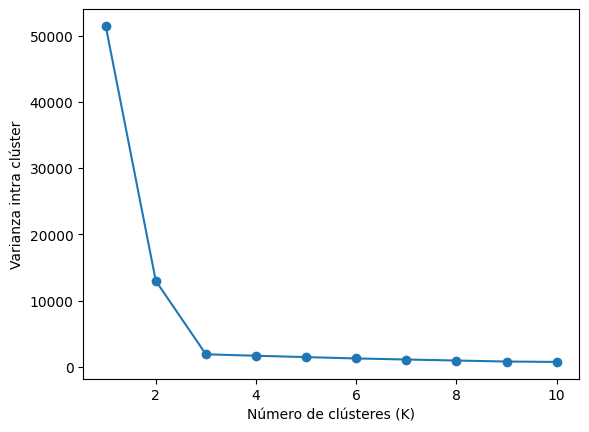

In [29]:
plt.plot(range(1, 11), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

Adicionalmente, el coeficiente de Silhouette muestra que este es máximo para $K=3$.

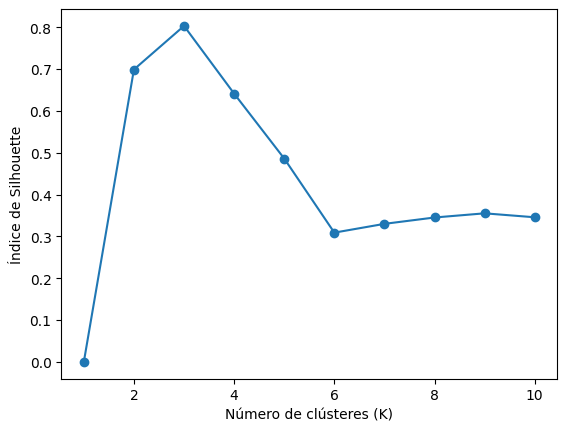

In [30]:
plt.plot(range(1, 11), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

En este caso ambos indicadores coinciden, pero a priori esto no tiene que ser así. En la práctica se tienden a utilizar ambos y dan una indicación del rango de posibles valores. Por esta razón, es recomendable calcular los dos y en función de los resultados decidir.

Te invito a utilizar estos indicadores con el ejemplo de 5 clusters descrito anteriormente.

# Referencias

- Amat Rodrigo, Joaquín (2022). Clustering con Python. Available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/py20-clustering-con-python.html. (Accedido 9 de Enero 2022)

- Hastie, T., Tibshirani, R., & Friedman, J. H. (2001). The elements of statistical learning: Data mining, inference, and prediction. New York: Springer.

- Jones, Aaron; Kruger, Christopher; Johnston, Benjamin. The Unsupervised Learning Workshop: Get started with unsupervised learning algorithms and simplify your unorganized data to help make future predictions. Packt Publishing. Kindle Edition.

- Kaufman, L. & Rousseeuw, P. (1990). Finding Groups in Data: An Introduction to Cluster Analysis, Wiley, New York.

- Macnaughton Smith, P., Williams, W., Dale, M. & Mockett, L. (1965). Dissimilarity analysis: a new technique of hierarchical subdivision, Nature 202: 1034–1035.

- Pedregosa, F. et al., 2011. Scikit-learn: Machine learning in Python. Journal of machine learning research, 12(Oct), pp.2825–2830.
